In [1]:
#loading libraries and setting plt to inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the data
tn_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
#checking out first entry and column names 
print(tn_budgets.columns)
tn_budgets.head(1)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [4]:
#checking the data types
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#cleaning numerical strings and converting to floats
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross']\
                                           .apply(lambda x: x.strip("$")\
                                           .replace(',', '')).astype('float')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross']\
                                           .apply(lambda x: x.strip("$")\
                                           .replace(',', '')).astype('float')
tn_budgets['production_budget'] = tn_budgets['production_budget']\
                                             .apply(lambda x: x.strip("$")\
                                             .replace(',', '')).astype('float')

In [6]:
# converting date strings to datetime objects
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

In [7]:
# rechecking dtypes and first entry
print(tn_budgets.info())
tn_budgets.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09


In [8]:
#adding net profit columns
tn_budgets['worldwide_net'] = tn_budgets['worldwide_gross'].sub(tn_budgets['production_budget'])
tn_budgets['domestic_net'] = tn_budgets['domestic_gross'].sub(tn_budgets['production_budget'])

In [9]:
top_10_ww_net = tn_budgets.sort_values(by='worldwide_net', ascending=False)
top_10_ww_net.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_net,domestic_net
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,459363944.0
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,437270625.0
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,163007020.0
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,398279547.0
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,256193157.0
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,500059566.0
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,247719760.0


In [10]:
#adding return on investment columns and checking results
tn_budgets['worldwide_roi'] = tn_budgets['worldwide_net'].divide(tn_budgets['production_budget'])
tn_budgets['domestic_roi'] = tn_budgets['domestic_net'].divide(tn_budgets['production_budget'])
tn_budgets.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_net,domestic_net,worldwide_roi,domestic_roi
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,5.532577,0.78943


In [11]:
#list of top ten ww rois
top_10_world_roi = tn_budgets.sort_values(by='worldwide_roi', ascending=False)\
                    .loc[:, ['movie', 'production_budget', 'worldwide_gross', 'worldwide_roi', 'release_date']]
top_10_world_roi.head(10)

,movie,production_budget,worldwide_gross,worldwide_roi,release_date
5745,Deep Throat,25000.0,45000000.0,1799.000000,1972-06-30
5613,Mad Max,200000.0,99750000.0,497.750000,1980-03-21
5492,Paranormal Activity,450000.0,194183034.0,430.517853,2009-09-25
5679,The Gallows,100000.0,41656474.0,415.564740,2015-07-10
5406,The Blair Witch Project,600000.0,248300000.0,412.833333,1999-07-14
5709,Super Size Me,65000.0,22233808.0,341.058585,2004-05-07
5346,Bambi,858000.0,268000000.0,311.354312,1942-08-13
5773,El Mariachi,7000.0,2041928.0,290.704000,1993-02-26
5676,Night of the Living Dead,114000.0,30087064.0,262.921614,1968-10-01
5210,Rocky,1000000.0,225000000.0,224.000000,1976-11-21


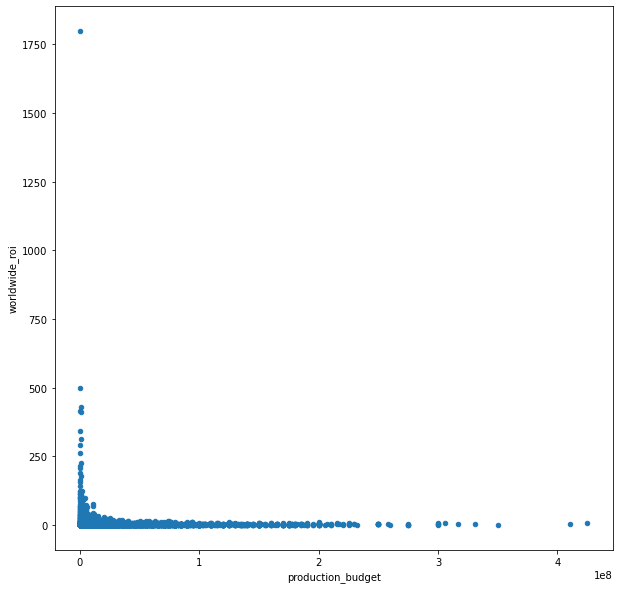

In [12]:
tn_budgets.plot(kind = 'scatter', x = 'production_budget', y = 'worldwide_roi', figsize=(10,10));

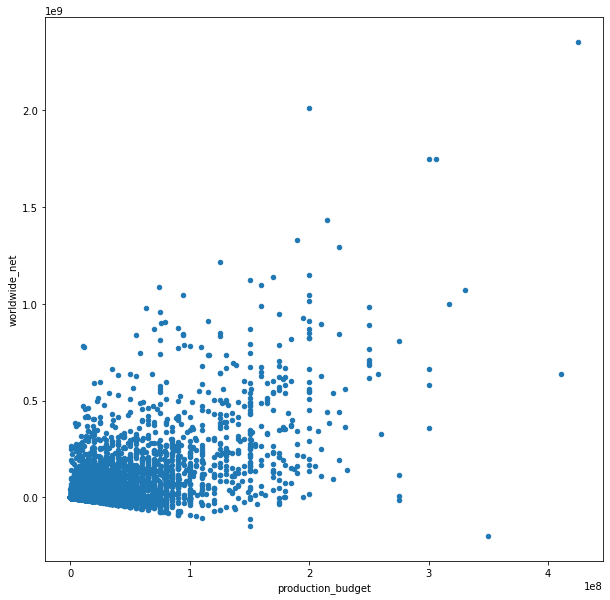

In [13]:
tn_budgets.plot(kind='scatter', x = 'production_budget', y = 'worldwide_net', figsize=(10,10));

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: worldwide_net, dtype: float64


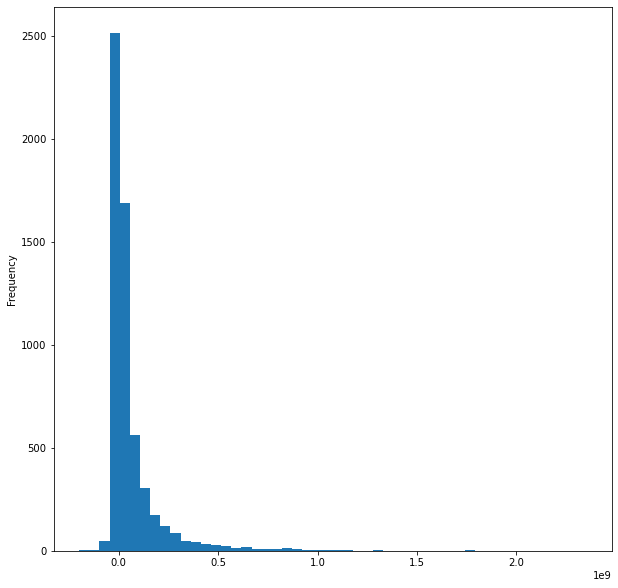

In [14]:
tn_budgets['worldwide_net'].plot(kind = 'hist', bins = 50, figsize=(10, 10));
print(tn_budgets['worldwide_net'].describe())